3a) Creating training and test data set points

In [20]:
import numpy as np
import pandas as pd
import math
from numpy.linalg import inv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import art3d
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import KFold

x=np.random.uniform(0,1, size=(50,1))
noiseless=np.sin(1+np.square(x))
noise=np.random.normal(0,0.032,size=(50,1))
noisefull=noiseless+noise

Xtrain=x[:40]
Xtest=x[40:]

#without noise
Ytrain_no_noise = noiseless[:40]
Ytest_no_noise = noiseless[40:]
 

#with noise
Ytrain=noisefull[:40]
Ytest=noisefull[40:]


Scatter plot

Text(0, 0.5, 'y')

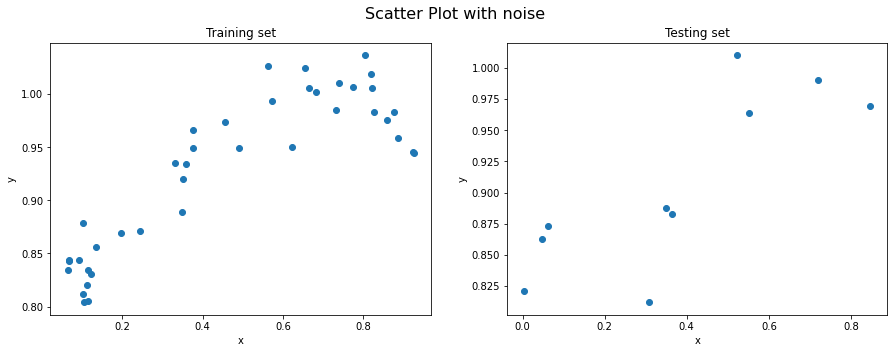

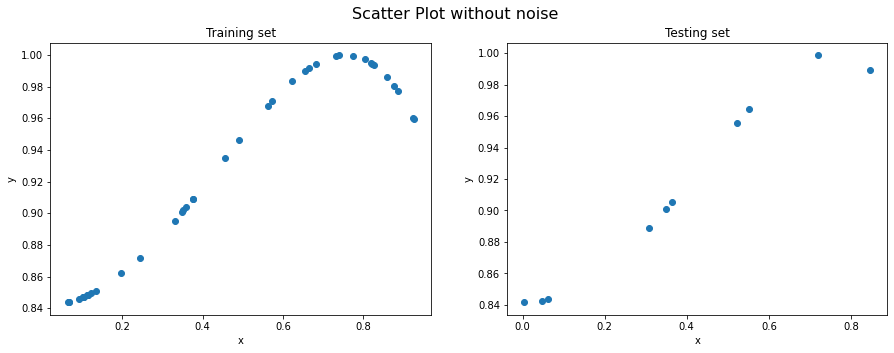

In [21]:
f = plt.figure(figsize=(15,5))
f.suptitle('Scatter Plot with noise', fontsize=16)

ax1 = f.add_subplot(121)
ax1.scatter(Xtrain, Ytrain)
ax1.set_title('Training set')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2 = f.add_subplot(122)
ax2.scatter(Xtest, Ytest)
ax2.set_title('Testing set')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

f = plt.figure(figsize=(15,5))
f.suptitle('Scatter Plot without noise', fontsize=16)

ax1 = f.add_subplot(121)
ax1.scatter(Xtrain, Ytrain_no_noise)
ax1.set_title('Training set')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2 = f.add_subplot(122)
ax2.scatter(Xtest, Ytest_no_noise)
ax2.set_title('Testing set')
ax2.set_xlabel('x')
ax2.set_ylabel('y')


Noiseless

Trainging  RMSE -  0.018992891117241444 Testing rmse - 0.04003377699071812


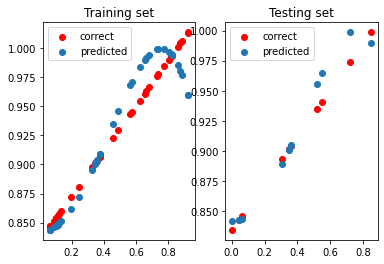

In [22]:


b = Ytrain_no_noise.reshape(Ytrain_no_noise.shape[0],1)
A = np.concatenate((Xtrain, np.ones((Xtrain.shape[0], 1))), axis=1)
z = np.dot(np.dot(inv(np.dot(A.T,A)),A.T),b)

y1 = z[0] * Xtrain + z[1]
y2 = z[0] * Xtest + z[1]

plt.subplot(1,2,1)
plt.title('Training set')
plt.scatter(Xtrain, y1,label='correct',c='r')
plt.scatter(Xtrain, Ytrain_no_noise,label='predicted')
plt.legend()

plt.subplot(1,2,2)
plt.title('Testing set')
plt.scatter(Xtest, y2,label='correct',c='r')
plt.scatter(Xtest, Ytest_no_noise,label='predicted')
plt.legend()

MSE = np.square(np.subtract(Ytrain_no_noise, y1)).mean()
RMSE = math.sqrt(MSE)
MSE1 = np.square(np.subtract(Ytest, y2)).mean()
RMSE1 = math.sqrt(MSE1)
print('Trainging  RMSE - ',RMSE,'Testing rmse -',RMSE1)

plt.show()

With noise



Trainging  RMSE -  0.03676524444619717 Testing rmse - 0.04023051205110837


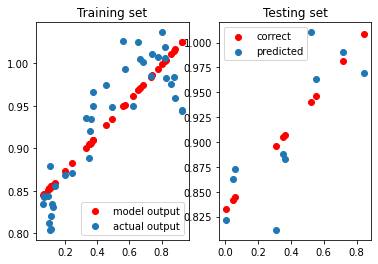

In [24]:



b = Ytrain.reshape(Ytrain.shape[0],1)
A = np.concatenate((Xtrain, np.ones((Xtrain.shape[0], 1))), axis=1)
z = np.dot(np.dot(inv(np.dot(A.T,A)),A.T),b)

y1 = z[0] * Xtrain + z[1]
y2 = z[0] * Xtest + z[1]

plt.subplot(1,2,1)
plt.title('Training set')
plt.scatter(Xtrain, y1,label='model output',c='r')
plt.scatter(Xtrain, Ytrain,label='actual output')
plt.legend()

plt.subplot(1,2,2)
plt.title('Testing set')
plt.scatter(Xtest, y2,label='correct',c='r')
plt.scatter(Xtest, Ytest,label='predicted')
plt.legend()

MSE = np.square(np.subtract(Ytrain, y1)).mean()
RMSE = math.sqrt(MSE)
MSE1 = np.square(np.subtract(Ytest, y2)).mean()
RMSE1 = math.sqrt(MSE1)
print('Trainging  RMSE - ',RMSE,'Testing rmse -',RMSE1)

plt.show()

3b)Polynomial Regression


Degree 1 Training RMSE -  0.03213275449963939 Testing RMSE - 0.05203031650757033
Degree 2 Training RMSE -  0.03189418970063183 Testing RMSE - 0.05079232401308767
Degree 3 Training RMSE -  0.026755973193313905 Testing RMSE - 0.03871439567277316
Degree 4 Training RMSE -  0.026023597882767646 Testing RMSE - 0.03768967738693309


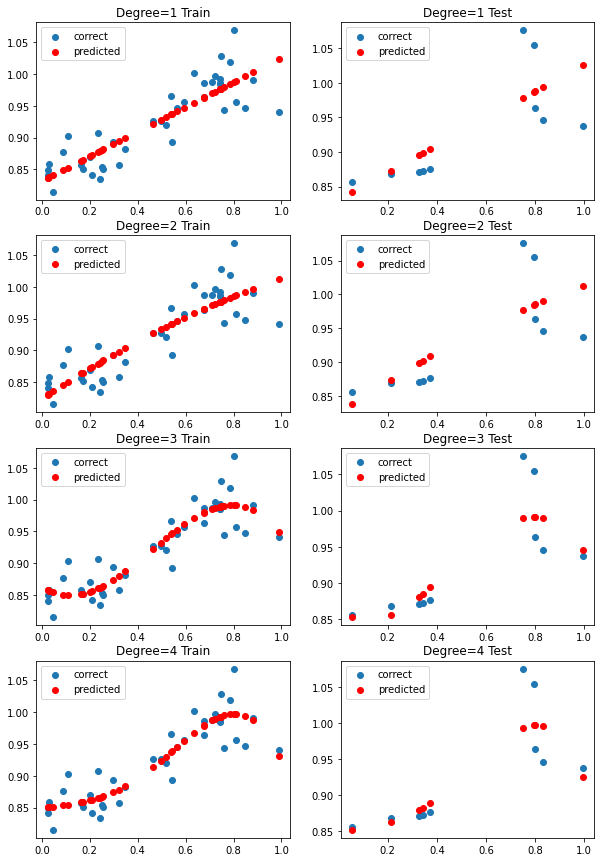

In [42]:
import numpy as np
from matplotlib import pyplot as plt
import math


def getPoweredX(deg, X_t):
    X_pow = X_t.copy()
    for i in range(2, deg + 1):
        powmat = (X_t[:, 1] ** i).reshape(X_pow.shape[0], 1)
        X_pow = np.append(X_pow, powmat, axis=1)
    return X_pow


def calculateEmpricalRisk(yh):
    error = sum((Y - yh) ** 2)
    return error / len(Y)


X_train = np.append(np.ones((Xtrain.shape[0], 1)), Xtrain, axis=1)
Y = Ytrain
X_test=np.append(np.ones((Xtest.shape[0], 1)), Xtest, axis=1)

#fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4, 2)

# For degree 1 polynomial
deg1 = 1
X1 = getPoweredX(deg1, X_train)
first_part = np.linalg.inv(np.dot(X1.transpose(), X1))
second_part = np.dot(first_part, X1.transpose())
W1 = np.dot(second_part, Y)

XT1=getPoweredX(deg1, X_test)
YTrainPredict=np.dot(X1, W1)
YTestPredict=np.dot(XT1, W1)
plt.figure(figsize=(10, 15)) 

plt.subplot(4,2,1)
plt.scatter(Xtrain, Ytrain, label = 'correct')
plt.scatter(X1[:,1], YTrainPredict, color = 'r', label = 'predicted')
plt.title("Degree=1 Train")
plt.legend()

plt.subplot(4,2,2)
plt.scatter(Xtest, Ytest, label = 'correct')
plt.scatter(XT1[:,1], YTestPredict, label = 'predicted', color = 'r')
plt.title("Degree=1 Test")
plt.legend()

MSE = np.square(np.subtract(Ytrain,YTrainPredict )).mean()
RMSE = math.sqrt(MSE)
MSE1 = np.square(np.subtract(Ytest, YTestPredict)).mean()
RMSE1 = math.sqrt(MSE1)
print('Degree 1 Training RMSE - ',RMSE,'Testing RMSE -',RMSE1)


# For degree 2 polynomial
deg2 = 2
X2 = getPoweredX(deg2, X_train)

first_part = np.linalg.pinv(np.dot(X2.transpose(), X2))
second_part = np.dot(first_part, X2.transpose())
W2 = np.dot(second_part, Y)

XT1=getPoweredX(deg1, X_test)

XT2=getPoweredX(deg2, X_test)

YTrainPredict=np.dot(X2, W2)
YTestPredict=np.dot(XT2, W2)

plt.subplot(4,2,3)
plt.scatter(Xtrain, Ytrain, label = 'correct')
plt.scatter(X2[:,1], YTrainPredict, color = 'r', label = 'predicted')
plt.title("Degree=2 Train")
plt.legend()

plt.subplot(4, 2, 4)
plt.scatter(Xtest, Ytest, label = 'correct')
plt.scatter(XT2[:,1], YTestPredict, label = 'predicted', color = 'r')
plt.title("Degree=2 Test")
plt.legend()


MSE = np.square(np.subtract(Ytrain,YTrainPredict )).mean()
RMSE = math.sqrt(MSE)
MSE1 = np.square(np.subtract(Ytest, YTestPredict)).mean()
RMSE1 = math.sqrt(MSE1)
print('Degree 2 Training RMSE - ',RMSE,'Testing RMSE -',RMSE1)




# For degree 3 polynomial
deg3 = 3
X3 = getPoweredX(deg3, X_train)

first_part = np.linalg.pinv(np.dot(X3.transpose(), X3))
second_part = np.dot(first_part, X3.transpose())
W3 = np.dot(second_part, Y)

XT3=getPoweredX(deg3, X_test)

YTrainPredict=np.dot(X3, W3)
YTestPredict=np.dot(XT3, W3)


plt.subplot(4, 2, 5)
plt.scatter(Xtrain, Ytrain, label = 'correct')
plt.scatter(X3[:,1], YTrainPredict, color = 'r', label = 'predicted')
plt.title("Degree=3 Train")
plt.legend()

plt.subplot(4,2,6)
plt.scatter(Xtest, Ytest, label = 'correct')
plt.scatter(XT3[:,1], YTestPredict, label = 'predicted', color = 'r')
plt.title("Degree=3 Test")
plt.legend()

MSE = np.square(np.subtract(Ytrain,YTrainPredict )).mean()
RMSE = math.sqrt(MSE)
MSE1 = np.square(np.subtract(Ytest, YTestPredict)).mean()
RMSE1 = math.sqrt(MSE1)
print('Degree 3 Training RMSE - ',RMSE,'Testing RMSE -',RMSE1)


# For degree 4 polynomial
deg4 = 4
X4 = getPoweredX(deg4, X_train)

first_part = np.linalg.pinv(np.dot(X4.transpose(), X4))
second_part = np.dot(first_part, X4.transpose())
W4 = np.dot(second_part, Y)

XT4=getPoweredX(deg4, X_test)
YTrainPredict=np.dot(X4, W4)
YTestPredict=np.dot(XT4, W4)


plt.subplot(4,2,7)
plt.scatter(Xtrain, Ytrain, label = 'correct')
plt.scatter(X4[:,1], YTrainPredict, label = 'predicted', color = 'r')
plt.title("Degree=4 Train")
plt.legend()

plt.subplot(4,2,8)
plt.scatter(Xtest, Ytest, label = 'correct')
plt.scatter(XT4[:,1], YTestPredict, label = 'predicted', color = 'r')
plt.title("Degree=4 Test")
plt.legend()

MSE = np.square(np.subtract(Ytrain,YTrainPredict )).mean()
RMSE = math.sqrt(MSE)
MSE1 = np.square(np.subtract(Ytest, YTestPredict)).mean()
RMSE1 = math.sqrt(MSE1)
print('Degree 4 Training RMSE - ',RMSE,'Testing RMSE -',RMSE1)


plt.show()